In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import random

In [4]:
# fetch dataset
apartment_for_rent_classified = fetch_ucirepo(id=555)

# data (as pandas dataframes)
X = apartment_for_rent_classified.data.features
y = apartment_for_rent_classified.data.targets

# metadata
print(apartment_for_rent_classified.metadata)

# variable information
print(apartment_for_rent_classified.variables)

{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [5]:
apartment_for_rent_classified.data.original

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,1325,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09


In [6]:
df_rent = apartment_for_rent_classified.data.original
df_rent = df_rent[['category', 'bathrooms', 'bedrooms', 'price_display', 'price_type', 'square_feet', 'state']]

In [7]:
df_rent.describe()

,category,bathrooms,bedrooms,price_display,price_type,square_feet,state
count,99826,99760,99699,99820,99823,99823,99521
unique,10,26,19,4546,6,4188,53
top,housing/rent/apartment,1,2,1350,Monthly,1000,TX
freq,99762,55669,45441,571,99816,1047,11279


In [8]:
df_rent.category.unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'Gym', 'housing/rent',
       'Parking,Patio/Deck', 'housing/rent/condo', 'housing/rent/other',
       'housing/rent/commercial/retail', '2'], dtype=object)

In [9]:
#df_rent[df_rent['category'] == 'housing/rent/apartment']
df_rent = df_rent[(df_rent['category'] == 'housing/rent/apartment') & (df_rent['price_type'] == 'Monthly')]

In [10]:
df_rent = df_rent.dropna()
df_rent.head()

,category,bathrooms,bedrooms,price_display,price_type,square_feet,state
0,housing/rent/apartment,1,1,2195,Monthly,542,CA
1,housing/rent/apartment,1.5,3,1250,Monthly,1500,VA
2,housing/rent/apartment,2,3,1395,Monthly,1650,NC
3,housing/rent/apartment,1,2,1600,Monthly,820,CA
4,housing/rent/apartment,1,1,975,Monthly,624,NM


In [11]:
df_rent['price_display'] = pd.to_numeric(df_rent['price_display'], errors='coerce')
df_rent['bathrooms'] = pd.to_numeric(df_rent['bathrooms'], errors='coerce')
df_rent['bedrooms'] = pd.to_numeric(df_rent['bedrooms'], errors='coerce')
df_rent['square_feet'] = pd.to_numeric(df_rent['square_feet'], errors='coerce')

(array([1.90049369e-04, 6.55720607e-07, 9.42237822e-08, 9.61467165e-09,
        1.15376060e-08, 5.76880299e-09, 9.61467165e-09, 1.92293433e-09,
        0.00000000e+00, 1.92293433e-09]),
 array([  100.,  5340., 10580., 15820., 21060., 26300., 31540., 36780.,
        42020., 47260., 52500.]),
 <BarContainer object of 10 artists>)

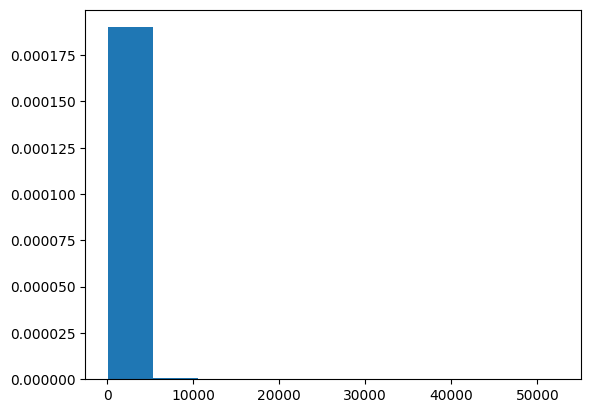

In [12]:
plt.hist(df_rent['price_display'], density=True)

In [13]:
df_rent.describe()

,bathrooms,bedrooms,price_display,square_feet
count,99272.000000,99272.000000,99244.000000,99272.000000
mean,1.445851,1.728453,1525.579440,955.960301
std,0.546985,0.748366,898.301925,365.039378
min,1.000000,0.000000,100.000000,107.000000
25%,1.000000,1.000000,1014.000000,730.000000
50%,1.000000,2.000000,1350.000000,900.000000
75%,2.000000,2.000000,1795.000000,1115.000000
max,9.000000,9.000000,52500.000000,12000.000000


In [14]:
df_rent['price_display'].mean()

1525.579440469953

In [15]:
df_rent['price_display'].std()

898.3019248604317

In [16]:
df_rent['square_feet'].mean()

955.9603009912161

In [17]:
df_rent['square_feet'].std()

365.03937755025146

In [18]:
df_rent_state = df_rent.groupby('state')
state_prop = df_rent_state['price_display'].mean()/df_rent['price_display'].mean()
state_prop

state
AK    0.691069
AL    0.630696
AR    0.573385
AZ    0.734274
CA    1.616430
CO    1.019437
CT    0.829511
DC    1.457015
DE    0.756996
FL    1.031060
GA    0.886445
HI    1.788955
IA    0.622854
ID    0.735670
IL    0.974057
IN    0.666749
KS    0.602349
KY    0.649861
LA    0.671738
MA    1.437158
MD    1.076854
ME    0.819907
MI    0.785315
MN    0.910817
MO    0.687290
MS    0.573001
MT    0.731436
NC    0.755685
ND    0.620274
NE    0.611799
NH    0.953126
NJ    1.335770
NM    0.553260
NV    0.769179
NY    1.659419
OH    0.728085
OK    0.667427
OR    0.967080
PA    0.851524
RI    1.333743
SC    0.749471
SD    0.581845
TN    0.771376
TX    0.798868
UT    0.852562
VA    0.973839
VT    0.927569
WA    1.197644
WI    0.807256
WV    0.571435
WY    0.518983
Name: price_display, dtype: float64

Text(0.5, 1.0, 'State Rent Prices vs Mean (Proportion)')

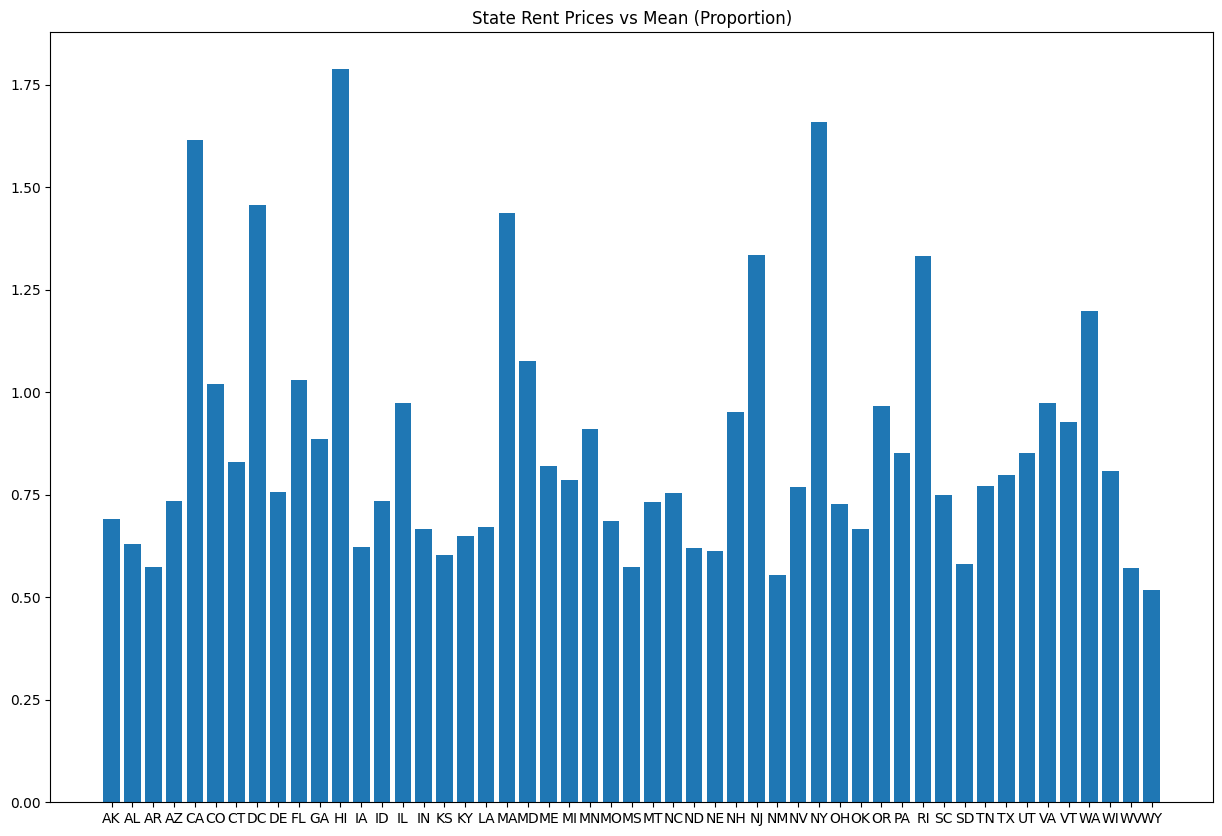

In [55]:
plt.figure(figsize=(15, 10))
plt.bar(state_prop.index, state_prop)
plt.title('State Rent Prices vs Mean (Proportion)')

In [42]:
#state_prop[random.randrange(0,len(state_prop))]
#np.random.choice(list(state_prop), replace=True, size=1000)

In [20]:
stats.linregress(df_rent['square_feet'][0:50000],df_rent['price_display'][0:50000])

LinregressResult(slope=1.132851822586686, intercept=511.65087928140474, rvalue=0.4318849989472765, pvalue=0.0, stderr=0.010580370358505859, intercept_stderr=10.872557903309715)

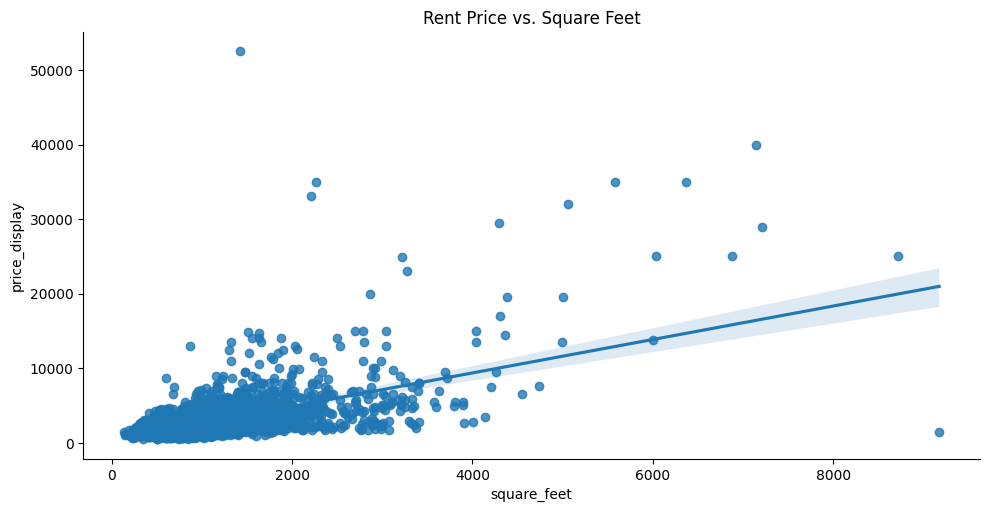

In [21]:
sns.lmplot(x='square_feet', y='price_display', data=df_rent[df_rent['state'] == 'CA'], aspect=2)
plt.title('Rent Price vs. Square Feet')
plt.show()

In [22]:
# Function to run the Monte Carlo simulation for a given state
def monte_carlo_simulation(num_simulations=10000):
    # Simulate rent prices and square footage
    simulated_data = np.random.normal(955.96, 365, num_simulations)
    simulated_data = (simulated_data * 1.133) + 511.65
    state_rand = np.random.choice(list(state_prop), replace=True, size=num_simulations)

    # Extract simulated rent prices
    simulated_rent_prices = simulated_data * state_rand

    return simulated_rent_prices

# Run the simulation for a specific state, e.g., 'California'
simulated_rent_prices = monte_carlo_simulation()


Text(0.5, 1.0, 'Simulation of Rent Prices')

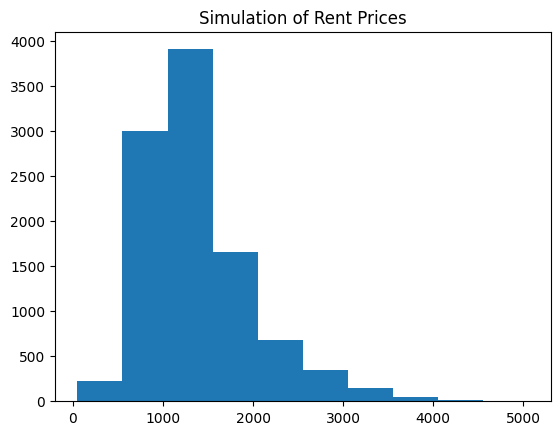

In [41]:
plt.hist(monte_carlo_simulation())
plt.title('Simulation of Rent Prices')

In [36]:
execution_times = []
for i in range(100):
  start_time = time.time()
  simulated_rent_prices = monte_carlo_simulation()
  end_time = time.time()
  execution_time = end_time - start_time
  execution_times.append(execution_time)

In [37]:
np.array(execution_times).mean()

0.0006512928009033203

In [38]:
np.array(execution_times).std()

0.00021456409279432053

In [39]:
np.array(execution_times).max()

0.002041339874267578

In [40]:
from scipy import stats

# Given data
means = [0.00065, 0.0009, 0.0006]
std_devs = [0.00021, 0.0000, 0.00027]
n = 30  # sample size

# Simulate data
np.random.seed(0)  # for reproducibility
python_data = np.random.normal(means[0], std_devs[0], n)
go_data = np.random.normal(means[1], std_devs[1], n)
r_data = np.random.normal(means[2], std_devs[2], n)

# Perform ANOVA test
f_value, p_value = stats.f_oneway(python_data, go_data, r_data)
f_value, p_value

(20.986932939550222, 3.6497470987116715e-08)